XGBoost Test Accuracy: 83.333%
XGBoost Test Precision: 75.000%
Best XGBoost Test Accuracy: 83.333%
Best XGBoost Test Precision: 75.000%


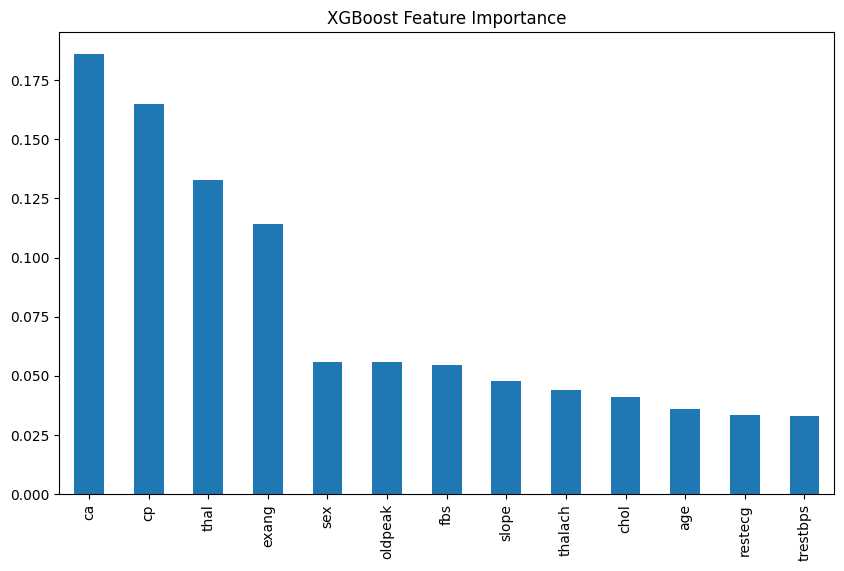

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import xgboost as xgb
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data = data.astype(float)

data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initialize classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# train the model
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'XGBoost Test Accuracy: {accuracy * 100:.3f}%')
print(f'XGBoost Test Precision: {precision * 100:.3f}%')

# grid gearch for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
print(f'Best XGBoost Test Accuracy: {accuracy_best * 100:.3f}%')
print(f'Best XGBoost Test Precision: {precision_best * 100:.3f}%')

# visualize feature importance
feature_names = X.columns
xgb_importance = best_model.feature_importances_
xgb_importance_series = pd.Series(xgb_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_importance_series.plot(kind='bar')
plt.title('XGBoost Feature Importance')
plt.savefig('./images/xgboost_feature_importance.png')
plt.show()
